In [1]:
import pandas as pd
import hypertools as hyp
import seaborn as sns
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

init_notebook_mode(connected=True)

In [2]:
months = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
data = []
for m in months:
    next_fname = 'uber-trip-data/uber-raw-data-' + m + '14.csv'
    df = pd.read_csv(next_fname, names=['Time', 'Lat', 'Long', 'Base'], header=0)
    try:
        data.append(df.set_index('Time'))
        print('Loaded ' + next_fname)
    except:
        print('Stuck on: ' + next_fname)
        break

Loaded uber-trip-data/uber-raw-data-apr14.csv
Loaded uber-trip-data/uber-raw-data-may14.csv
Loaded uber-trip-data/uber-raw-data-jun14.csv
Loaded uber-trip-data/uber-raw-data-jul14.csv
Loaded uber-trip-data/uber-raw-data-aug14.csv
Loaded uber-trip-data/uber-raw-data-sep14.csv


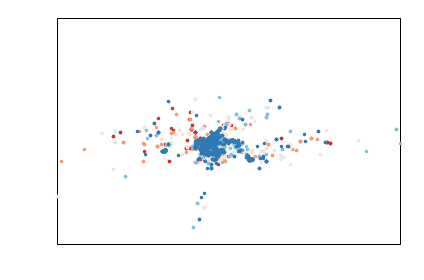

In [3]:
n = 1000
bases = list(map(lambda x: np.array(x.values, ndmin=2).T, list(map(lambda x: x.head(n)['Base'], data))))
x = list(map(lambda x: x.head(n), data))
hyp.plot(x, '.', palette='RdBu', ndims=2);

In [4]:
x[0].head()

,Lat,Long,Base
Time,,,
4/1/14 0:11,40.7690,-73.9549,B02512
4/1/14 0:17,40.7267,-74.0345,B02512
4/1/14 0:21,40.7316,-73.9873,B02512
4/1/14 0:28,40.7588,-73.9776,B02512
4/1/14 0:33,40.7594,-73.9722,B02512


In [5]:
locations = list(map(lambda x: go.Scattergeo(lat=x['Lat'], lon=x['Long']), x))

In [22]:
layout = dict(title='Uber rides',              
             geo=dict(scope='usa',
                 projection=dict(type='albers usa'),
                 showland=True,
                 landcolor = 'rgb(243, 243, 243)',
                 countrycolor = 'rgb(204, 204, 204)'))
fig = dict(data=locations, layout=layout)
iplot(fig)